In [19]:

#dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn import model_selection
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression

In [20]:
#load assesment file
FB = "resources/HistoricalData_fb.csv"
FB_df = pd.read_csv(FB)
FB_df.head()

,Date,Close/Last,Volume,Open,High,Low
0,05/24/2021,$324.63,16445360,$318.21,$325.95,$318.03
1,05/21/2021,$316.23,13600900,$319.29,$319.93,$315.8101
2,05/20/2021,$318.61,17320240,$313.58,$319.25,$313.16
3,05/19/2021,$313.59,19106240,$304.185,$314.66,$303.57
4,05/18/2021,$309.96,14522400,$315.59,$316.5,$309.81


CLEAN, RESHAPE AND CONVERT DATATYPE

In [21]:
FB_df['Date']= pd.to_datetime(FB_df['Date'])
FB_df['Close/Last'] = FB_df['Close/Last'].str.replace('$','')
FB_df['Open'] = FB_df['Open'].str.replace('$','')
FB_df['High'] = FB_df['High'].str.replace('$','')
FB_df['Low'] = FB_df['Low'].str.replace('$','')
FB_df = FB_df.apply( pd.to_numeric)

<ipython-input-21-3fd67d6c6cd2>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  FB_df['Close/Last'] = FB_df['Close/Last'].str.replace('$','')
<ipython-input-21-3fd67d6c6cd2>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  FB_df['Open'] = FB_df['Open'].str.replace('$','')
<ipython-input-21-3fd67d6c6cd2>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  FB_df['High'] = FB_df['High'].str.replace('$','')
<ipython-input-21-3fd67d6c6cd2>:5: FutureWarning: The default value of regex will change from True to False in a future vers

FORMAT DATE COLUMN

In [22]:
FB_df['Date']= pd.to_datetime(FB_df['Date'])
FB_df.head()

,Date,Close/Last,Volume,Open,High,Low
0,2021-05-24,324.63,16445360,318.210,325.95,318.0300
1,2021-05-21,316.23,13600900,319.290,319.93,315.8101
2,2021-05-20,318.61,17320240,313.580,319.25,313.1600
3,2021-05-19,313.59,19106240,304.185,314.66,303.5700
4,2021-05-18,309.96,14522400,315.590,316.50,309.8100


In [23]:
FB_df['Open_Close'] = (FB_df['Open'] - FB_df['Close/Last'])/FB_df['Open']
FB_df['High_Low'] = (FB_df['High'] - FB_df['Low'])/FB_df['Low']
FB_df['Increase_Decrease'] = np.where(FB_df['Volume'].shift(-1) > FB_df['Volume'],1,0)
FB_df['Buy_Sell_on_Open'] = np.where(FB_df['Open'].shift(-1) > FB_df['Open'],1,0)
FB_df['Buy_Sell'] = np.where(FB_df['Close/Last'].shift(-1) > FB_df['Close/Last'],1,0)
FB_df['Returns'] = FB_df['Close/Last'].pct_change()
FB_df = FB_df.dropna()
FB_df.head()

,Date,Close/Last,Volume,Open,High,Low,Open_Close,High_Low,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns
1,2021-05-21,316.23,13600900,319.290,319.93,315.8101,0.009584,0.013045,1,0,1,-0.025876
2,2021-05-20,318.61,17320240,313.580,319.25,313.1600,-0.016041,0.019447,1,0,0,0.007526
3,2021-05-19,313.59,19106240,304.185,314.66,303.5700,-0.030919,0.036532,0,1,0,-0.015756
4,2021-05-18,309.96,14522400,315.590,316.50,309.8100,0.017840,0.021594,1,0,1,-0.011576
5,2021-05-17,315.46,15371050,313.550,315.68,311.5800,-0.006092,0.013159,1,0,1,0.017744


SPLIT DATAFRAME

In [24]:
#setup datetime for first 4 years
start_date = "2016-05-24"
end_date = "2020-05-24"

after_start_date = FB_df["Date"] >= start_date
before_end_date = FB_df["Date"] <= end_date
between_two_dates = after_start_date & before_end_date
FB_df_4 = FB_df.loc[between_two_dates]
FB_df_4.head()

,Date,Close/Last,Volume,Open,High,Low,Open_Close,High_Low,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns
252,2020-05-22,234.91,33925560,231.51,235.9900,228.74,-0.014686,0.031695,1,1,0,0.011671
253,2020-05-21,231.39,47782640,234.72,237.2000,231.20,0.014187,0.025952,1,0,0,-0.014984
254,2020-05-20,229.97,50162880,223.50,231.3400,223.19,-0.028949,0.036516,0,0,0,-0.006137
255,2020-05-19,216.88,31843150,213.27,220.4900,212.83,-0.016927,0.035991,0,0,0,-0.056920
256,2020-05-18,213.19,20167440,212.15,214.6445,210.94,-0.004902,0.017562,0,0,0,-0.017014


SPLIT DATAFRAME

In [25]:
#setup datetime for last year
start_date = "2020-05-25"
end_date = "2021-05-24"

after_start_date = FB_df["Date"] >= start_date
before_end_date = FB_df["Date"] <= end_date
between_two_dates = after_start_date & before_end_date
FB_df_ls = FB_df.loc[between_two_dates]
FB_df_ls.head()

,Date,Close/Last,Volume,Open,High,Low,Open_Close,High_Low,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns
1,2021-05-21,316.23,13600900,319.290,319.93,315.8101,0.009584,0.013045,1,0,1,-0.025876
2,2021-05-20,318.61,17320240,313.580,319.25,313.1600,-0.016041,0.019447,1,0,0,0.007526
3,2021-05-19,313.59,19106240,304.185,314.66,303.5700,-0.030919,0.036532,0,1,0,-0.015756
4,2021-05-18,309.96,14522400,315.590,316.50,309.8100,0.017840,0.021594,1,0,1,-0.011576
5,2021-05-17,315.46,15371050,313.550,315.68,311.5800,-0.006092,0.013159,1,0,1,0.017744


PLOT FIRST DF (4YEARS

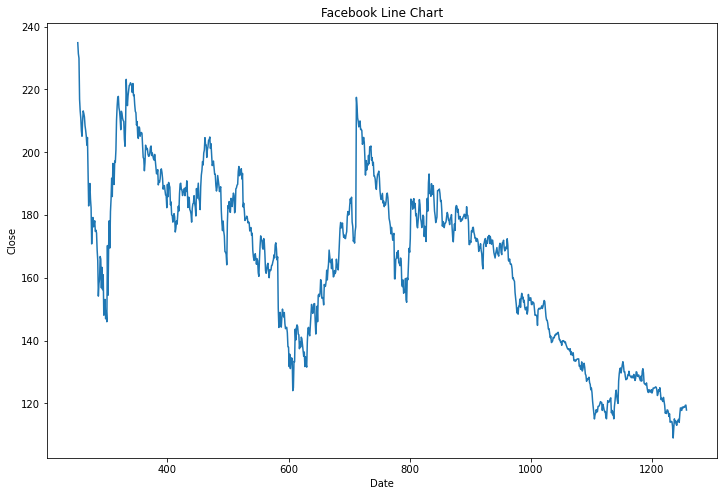

In [26]:
plt.figure(figsize=(12,8))
plt.plot(FB_df_4['Close/Last'])
plt.title("Facebook Line Chart")
plt.xlabel("Date")
plt.ylabel("Close")
plt.show()

PLOT SECOND DF (LAST YEAR)

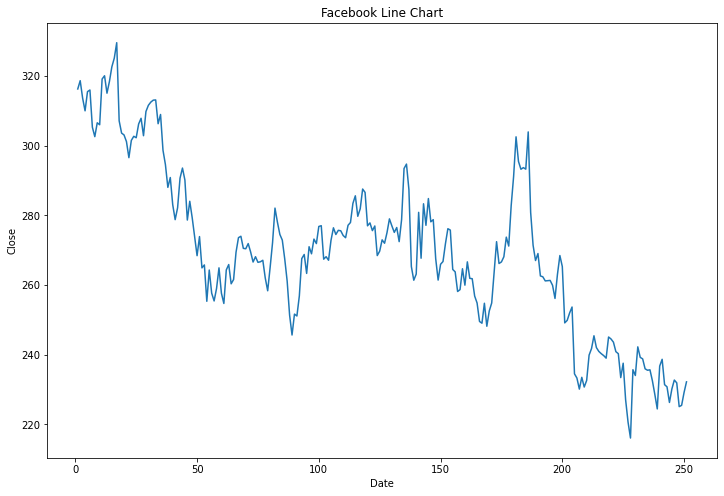

In [27]:
plt.figure(figsize=(12,8))
plt.plot(FB_df_ls['Close/Last'])
plt.title("Facebook Line Chart")
plt.xlabel("Date")
plt.ylabel("Close")
plt.show()

SHAPPING, FITTING, TRAINING, TESTING ML ON 1ST DF

In [28]:
FB_df_4.shape

(1006, 12)

In [29]:
X = np.array(FB_df_4['Open']).reshape(1006,-1)
Y = np.array(FB_df_4['Close/Last']).reshape(1006,-1)

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
lr = LinearRegression()

In [32]:
lr.fit(X, Y)

LinearRegression()

In [33]:
print('Linear Regression intercept:', lr.intercept_)
print('coefficient count:', len(lr.coef_))

Linear Regression intercept: [0.30037687]
coefficient count: 1


In [34]:
from sklearn.metrics import accuracy_score
print('Accuracy:', lr.score(X, Y))

Accuracy: 0.992608787883672


In [35]:
# Predicting the price
lr.predict(X)

array([[231.52151514],
       [234.72750993],
       [223.52150945],
       ...,
       [119.7111984 ],
       [118.3928454 ],
       [118.28298265]])

In [36]:
#daily Return
DA_RE = FB_df_4['Close/Last'].pct_change(1)
DA_RE.head()

252         NaN
253   -0.014984
254   -0.006137
255   -0.056920
256   -0.017014
Name: Close/Last, dtype: float64

Text(0.5, 1.0, '4 Years CLosing Price vs Predicted Closing Price')

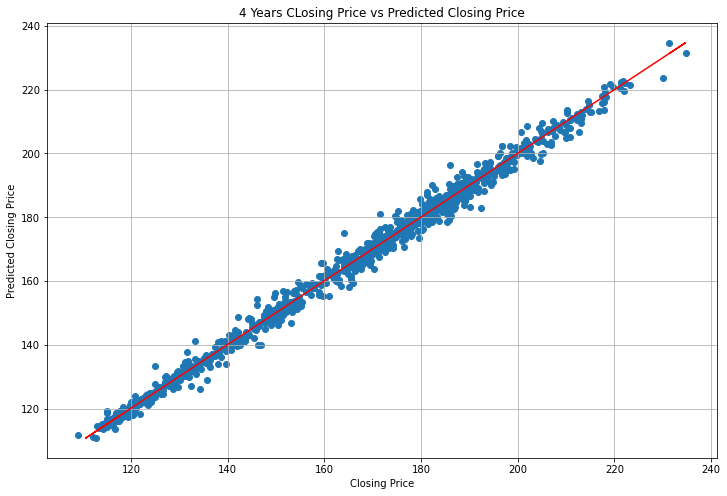

In [37]:
plt.figure(figsize=(12,8))
plt.scatter(FB_df_4['Close/Last'], lr.predict(X))
plt.plot(X, lr.predict(X), color = 'red')
plt.xlabel('Closing Price')
plt.ylabel('Predicted Closing Price')
plt.savefig('images/FB_4y.jpg', dpi=40)
plt.grid()
plt.title('4 Years CLosing Price vs Predicted Closing Price')

TRAINING, TESTING ML ON 2ND DF

In [38]:
FB_df_ls.shape

(251, 12)

In [39]:
X_ls = np.array(FB_df_ls['Open']).reshape(251,-1)
Y_ls = np.array(FB_df_ls['Close/Last']).reshape(251,-1)

In [40]:
lr.fit(X_ls, Y_ls)

LinearRegression()

In [41]:
print('Linear Regression intercept:', lr.intercept_)
print('coefficient count:', len(lr.coef_))

Linear Regression intercept: [5.24631465]
coefficient count: 1


In [42]:
print('Accuracy:', lr.score(X_ls, Y_ls))

Accuracy: 0.9618323464269558


In [43]:
# Predicting the price
lr.predict(X_ls)

array([[318.33463695],
       [312.73554421],
       [303.52302647],
       [314.7065033 ],
       [312.70612691],
       [308.7740145 ],
       [305.38445515],
       [300.52736477],
       [300.15474564],
       [313.49058824],
       [321.36461883],
       [313.65728627],
       [317.25600262],
       [319.05536079],
       [325.08100438],
       [325.05550939],
       [328.95428219],
       [306.63635737],
       [303.61618126],
       [302.69443919],
       [298.20339808],
       [300.7234801 ],
       [301.32653475],
       [301.3706607 ],
       [304.32906049],
       [307.43062447],
       [305.63616918],
       [306.57752277],
       [311.39215418],
       [310.25468525],
       [310.59788709],
       [313.98087657],
       [305.63616918],
       [308.0846691 ],
       [300.29202637],
       [297.85039049],
       [289.60374076],
       [289.4468485 ],
       [285.46570725],
       [278.14276074],
       [280.76874504],
       [290.59412319],
       [292.70236301],
       [290

Text(0.5, 1.0, '1 Year CLosing Price vs Predicted Closing Price')

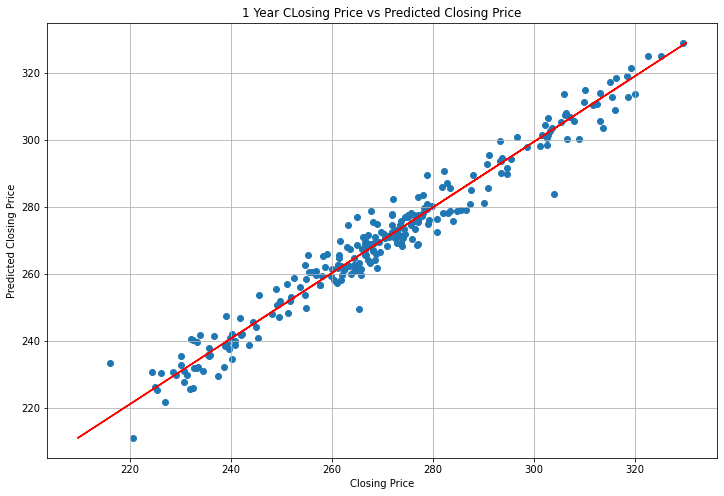

In [44]:
plt.figure(figsize=(12,8))
plt.scatter(FB_df_ls['Close/Last'], lr.predict(X_ls))
plt.plot(X_ls, lr.predict(X_ls), color = 'red')
plt.xlabel('Closing Price')
plt.ylabel('Predicted Closing Price')
plt.savefig('images/FB_ls.jpg', dpi=40)
plt.grid()
plt.title('1 Year CLosing Price vs Predicted Closing Price')